In [1]:
%matplotlib inline
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
""" 
1、函数 make_regression()：用来生成回归模型数据。
2、参数说明：
n_samples：样本数
n_features：特征数
noise：噪音
bias：偏差
3、X : array of shape [n_samples, n_features]
y : array of shape [n_samples] or [n_samples, n_targets]
4、下面的语句的作用为:生成一组数据集{(x1,y1),(x2,y2),……,(x100,y100)}，后面我们将学习
一个线性模型来尽可能的拟合此数据集。
"""
X, y= make_regression(n_samples=100, n_features=1, noise=14, bias=5)
print(X)
print(y)

[[ 2.07648842e-01]
 [-3.75148902e-01]
 [-7.27511006e-01]
 [ 3.58837996e-01]
 [-7.12719410e-02]
 [-1.04478218e+00]
 [ 1.65087352e+00]
 [-8.54674741e-02]
 [-9.13893444e-01]
 [-1.46509800e+00]
 [-1.14015789e+00]
 [-1.11561128e-01]
 [ 1.16190070e+00]
 [-3.34372824e-01]
 [-1.38021552e+00]
 [-1.01588361e-01]
 [ 4.93738793e-01]
 [-1.03068445e+00]
 [-8.44439616e-03]
 [-7.76156922e-02]
 [ 1.41312677e+00]
 [ 3.32978967e-01]
 [ 4.00996585e-01]
 [ 3.03674477e-01]
 [-1.23465387e+00]
 [-5.97704897e-01]
 [-3.53148373e-01]
 [-9.54592356e-01]
 [-2.17092711e-01]
 [-3.90826636e-01]
 [ 1.23495007e+00]
 [ 1.66683570e+00]
 [-1.08824697e-01]
 [-4.31085131e-02]
 [-7.39926979e-01]
 [-1.85720098e-01]
 [-1.28622102e+00]
 [-9.17459264e-01]
 [-4.80003633e-01]
 [ 3.61028159e-01]
 [ 7.17361151e-01]
 [-1.90553757e+00]
 [ 5.12492850e-01]
 [-3.96117651e-01]
 [ 1.45770179e-01]
 [ 7.11607207e-01]
 [-1.42875022e+00]
 [ 7.66230104e-04]
 [ 9.53767959e-01]
 [ 7.96390032e-01]
 [-6.40636468e-01]
 [-7.70084983e-01]
 [-5.2455866

In [3]:
""" 1、定义一个名为 plotLine()的函数，用来画出生成数据集的散点图和拟合线性模型(y=k*x+b)
2、参数说明：
theta0:即 y=k*x+b 中的参数 b
theta1:即 y=k*x+b 中的参数 k
y = theta1 *x+theta0
X:数据集的横坐标（列表类型）
y:数据集的纵坐标（列表类型）
3、np.linspace(start, stop, num)函数：用来返回 num 个等间距的样本，在区间[start, stop]中。
4、plt.plot(x,y,color,label)：用来画线图
参数说明：x:x 轴上的数值；y:y 轴上的数值;color:用来设置线条的颜色，color='r'表示红
色(b 表示蓝色)；label 用于指定标签
5、plt.scatter(x,y)：用来画散点图。
参数说明:x:x 轴上的数值；y:y 轴上的数值。
6、plt.axis(）函数用来指定坐标轴的范围。
参数需要以列表的形式给出。
7、plt.show()：将图像显示出。
"""
def plotLine(theta0, theta1, X, y):
    max_x = np.max(X) + 100 #np.max(X)用来取出 X 中的最大值
    min_x = np.min(X) - 100 #np.min(X)用来取出 X 中的最小值
    xplot = np.linspace(min_x, max_x, 1000) #在区间[min_x,max_x]中返回 1000 个等间隔的样本
    yplot = theta0 + theta1 * xplot #将 x 带入线性方程 y=k*x+b 中求得 y
    print(theta0) #打印参数 theta0
    print(theta1) #打印参数 theta1
    plt.plot(xplot, yplot, color='g', label='Regression Line') #画出线性模型，参数依次表示：横坐标，纵坐标，颜色，标签
    plt.scatter(X,y) #画散点图，参数依次表示横坐标、纵坐标
    plt.axis([-5, 5, -150, 150]) #设置横坐标范围为【-10，10】，纵轴范围为【0，200】
    plt.show() #显示可视化图像

In [4]:
""" 
1、定义一个名为 hypothesis()的函数,根据给定的 x 值预测 y 的值，计算公式为:y=theta0 +
(theta1*x) 
""" 
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x)

In [5]:
""" 1、定义一个计算损失值的函数，采用最小二乘法来计算损失。
2、zip(x,y)函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然
后返回由这些元组组成的列表。
譬如：x={x1,x2,x3};y={y1,y2,y3};则 zip(x,y)=[(x1,y1),(x2,y2),(x3,y3)]
3、y**2:表示 y 的平方。
""" 
def cost(theta0, theta1, X, y): #计算损失
    costValue = 0
    for (xi, yi) in zip(X, y): #使用 zip()函数，包为元组的列表
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2) #使用最小二乘法来计算损失
    return costValue #返回损失值

In [6]:
""" 1、定义名为 derivatives()的函数，用来计算参数的梯度。
2、len()函数：用来返回对象（字符、列表、元组等）长度或项目个数。其参数可以是字符、
列表、元组等。
""" 
def derivatives(theta0, theta1, X, y): #derivative:导数
    dtheta0 = 0 #dtheta0：参数 theta0 的梯度，初始化为 0
    dtheta1 = 0 #dtheta1：参数 theta1 的梯度，初始化为 0
    for (xi, yi) in zip(X, y): #使用 zip()函数依次取出(xi,yi)
        dtheta0 += hypothesis(theta0, theta1, xi) - yi #计算公式为：损失函数对参数dtheta0 求偏导。
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi #计算公式为：损失函数对参数dtheta1 求偏导。
    dtheta0 /= len(X) #求平均梯度，len(X)函数用来计算 X 中的样本数
    dtheta1 /= len(X) #求平均梯度
    return dtheta0, dtheta1

In [7]:
""" 1、定义一个名为 updateParameters()的函数，用来对参数进行更新。
参数说明：
theta0 和 theta1 为待更新参数。
X、 y 分别表示横轴和纵轴的数值。
alpha：学习率。
2、参数的更新：
对于参数 w，其更新方式为：w=w-学习率*梯度值。其中学习率是一个超参数。
""" 
def updateParameters(theta0, theta1, X, y, alpha): #参数的更新，alpha 表示学习率超参
    dtheta0, dtheta1 = derivatives(theta0, theta1, X, y) #dtheta0, dtheta1 分 别 表 示 参 数theta0，theta1 的梯度值。
    theta0 = theta0 - (alpha * dtheta0) #依据参数更新方式更新参数 theta0
    theta1 = theta1 - (alpha * dtheta1) #依据参数更新方式更新参数 theta1
    return theta0, theta1 #返回更新好的参数

0.7237460862214967
0.09232503297812977


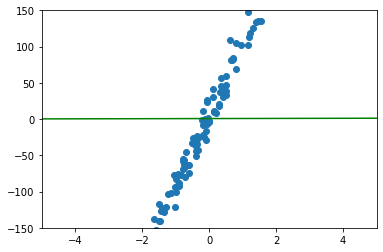

[-1.62053242]
[35.41160731]


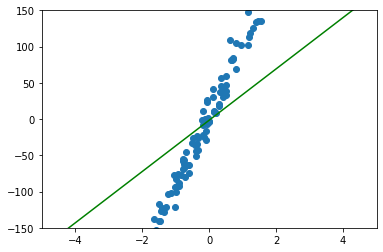

[-1.44211198]
[57.57609386]


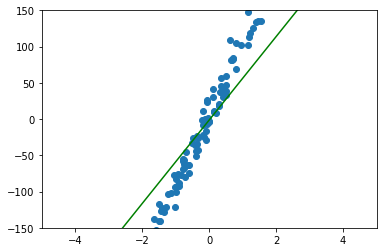

[-0.3281854]
[71.56017339]


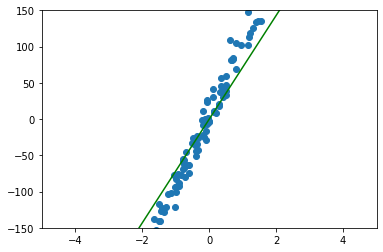

[0.98284927]
[80.42847704]


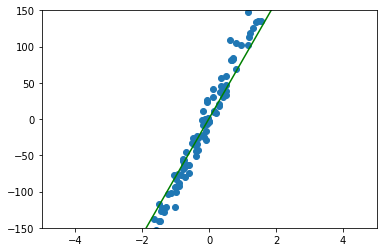

[2.18151798]
[86.0799318]


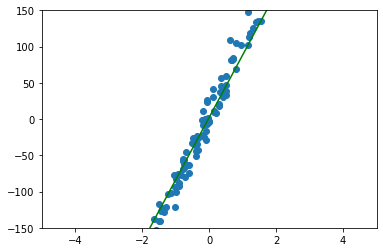

[3.1659935]
[89.69788032]


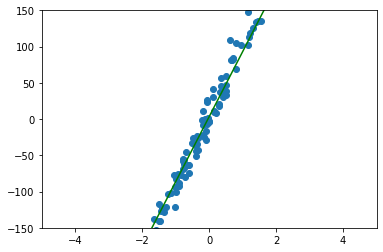

[3.92811063]
[92.02386859]


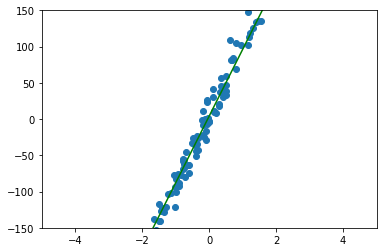

[4.49655204]
[93.52511365]


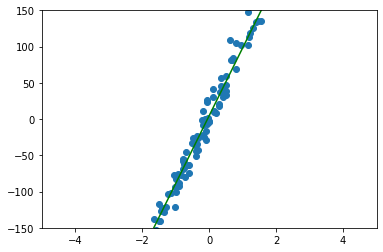

[4.9099364]
[94.497524]


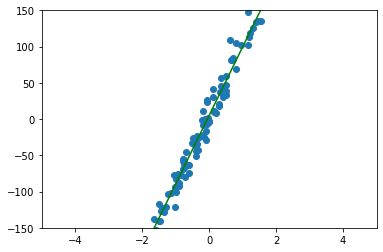

In [8]:
""" 1、定义一个名为 LinearRegression()的线性回归函数。
参数说明：
X：表示给定数据集的横坐标。
y：表示给定数据集的纵坐标。
2、np.random.rand()函数:用来返回一个或一组服从“0~1”均匀分布的随机样本值。随机
样本取值范围是[0,1)，
不包括 1。当不给定参数时，返回的是一个[0，1)区间内的随机数。）
""" 
def LinearRegression(X, y):
    theta0 = np.random.rand() #给 theta0 赋一个随机初始值。
    theta1 = np.random.rand() #给 theta1 赋一个随机初始值。
    for i in range(0, 1000): #进行 1000 次参数的更新，每隔 100 次跟新打印一次图片
        if i % 100 == 0: #只有当 i 整除 100 时才进行一次图片打印
            plotLine(theta0, theta1, X, y)
            #print(cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005) #调用参数更新函数来对参数进行更新，其中学习率指定为：0.005.
LinearRegression(X, y) #调用线性回归函数。